Stakeholder:

Jacob Phillips 	Buyer 	Unlimited Budget, 4+ bathrooms or smaller house nearby, big lot (tennis court & pool), golf, historic, no waterfront

** Understanding
Browse data, columns and data types
check your understanding


In [2]:
import numpy as np
import pandas as pd

df = pd.read_csv('data/King_County_House_prices_dataset.csv')
display(df.head())
df.columns

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

Stakeholder:

Jacob Phillips 	Buyer 	Unlimited Budget, 4+ bathrooms or smaller house nearby, big lot (tennis court & pool), golf, historic, no waterfront


** Hypothesis:
What are your assumptions
Ask yourself questions: ???

Criteria:
1.) Unlimited Budget 
    --> sort for higher priced houses:  hightest 10 % available 
    --> sort for condition very good (= nicht Renovierungsbeürftig) --> sort for values 4 and 5 (list range = 1-5)
    --> grade ("construction and design quality"): "11-13 have a high quality level of construction and design", see column definition homepage shared by Anna.
2.) 4+ bathrooms or smaller house nearby
    --> sort for nr. of bathrooms 4+ 
    --> check for smaller house nearby (groubby ZIP CODE) with condition very good 
3.) big lot (tennis court & pool), golf, historic
    --> sort for big lot (sqft_lot15), for tennis court (?) & pool (?) & golf available
5.) historic --> sort for yr_built, eventuell yr_renovated
4.) no waterfront
    --> sort for waterfront = NO.

    
Hypothesis / Questions to be asked:
1.) Is a smaller house nearby a good choice in comparison to one house with 4+ bathrooms
2.) how to find out if tennis, pool and golf are available within the property or close nearby?
3.) how to find historic area?
4.) The larger the property the higher price?


In [3]:
#clean data for price - if required
#df['price'].describe
#df.describe()
#--> OK

#--> sort for higher priced houses:  --> quantile .80
#df.price.mean() 
df.price.max() * 0.9
df.query("price > @df['price'].quantile(.80)").shape # 4320 rows
#df.query('price > 0.5 * @df.price.max()') --> 12 rows


(4320, 21)

In [4]:
#--> sort for condition very good (= nicht Renovierungsbeürftig) --> sort for values 4 and 5 (list range = 1-5)
#display (df.condition.describe())

df.query('condition > 4').shape #--> 1701 rows


(1701, 21)

In [5]:
#--> grade ("construction and design quality"): "11-13 have a high quality level of construction and design", see column definition homepage shared by Anna.
#--> 11-13 is too high
df.grade.describe()
df.query('grade >=10').shape #--> 1635 rows

(1635, 21)

In [6]:
#--> sort for nr. of bathrooms 4+ 
#display(df.bathrooms.describe())
df.query('bathrooms >=4').shape #--> only 402 rows


(402, 21)

In [7]:
#--> sort for big lot (sqft_lot15), for tennis court (?) & pool (?) & golf available
df.sqft_lot.describe()
df.query("sqft_lot > @df['sqft_lot'].quantile(.90)").shape

(2160, 21)

In [8]:
# 5.) historic --> sort for yr_built, eventuell yr_renovated
df.yr_built.describe()
#df.query('yr_built < 1950')
df.query('yr_renovated > 2005')


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
103,2450000295,10/7/2014,1090000.0,3,2.50,2920,8113,2.0,0.0,0.0,...,8,2920,0.0,1950,2010.0,98004,47.5814,-122.196,2370,8113
158,8029200135,11/13/2014,247000.0,3,2.00,1270,7198,1.5,0.0,0.0,...,7,1270,0.0,1916,2013.0,98022,47.2086,-121.996,1160,7198
379,7132300695,4/21/2015,435000.0,3,1.50,1300,3348,1.5,0.0,0.0,...,7,1300,0.0,1904,2014.0,98144,47.5920,-122.307,1590,2577
398,1604601375,6/19/2014,378750.0,3,2.50,2160,3000,1.5,0.0,0.0,...,7,1260,900.0,1909,2011.0,98118,47.5644,-122.289,1060,3500
435,2268400350,9/16/2014,749000.0,4,2.50,1710,9627,1.0,0.0,0.0,...,9,1440,270.0,1976,2014.0,98006,47.5590,-122.164,2140,9131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19577,421059018,11/4/2014,257000.0,3,1.75,1397,18000,1.0,0.0,0.0,...,7,1397,0.0,1965,2014.0,98092,47.3388,-122.166,1950,31294
20041,126039256,9/4/2014,434900.0,3,2.00,1520,5040,2.0,0.0,0.0,...,7,1520,0.0,1977,2006.0,98177,47.7770,-122.362,1860,8710
20428,4305600360,2/25/2015,500012.0,4,2.50,2400,9612,1.0,0.0,0.0,...,8,1230,1170.0,1962,2009.0,98059,47.4799,-122.127,2430,5539
20431,3319500628,2/12/2015,356999.0,3,1.50,1010,1546,2.0,NaN,0.0,...,8,1010,0.0,1971,2014.0,98144,47.5998,-122.311,1010,1517


In [9]:
# --> sort for waterfront = NO.

df.query('waterfront < 1').shape

(19075, 21)

In [10]:
# tennis court (?) & pool (?) & golf available

df [df.isin(['tennis', 'golf', 'pool' ]).any(axis =1)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [11]:
# #--> sort for big lot (sqft_lot15), for tennis court (?) & pool (?) & golf available
# #df.query("sqft_lot > @df['sqft_lot'].quantile(.90)").shape
# #--> sort for nr. of bathrooms 4+ 
# df.query('bathrooms >=4').shape #--> only 402 rows
# df.query('grade >=10').shape #--> 1635 rows
# df.query('condition > 4').shape #--> 1701 rows

#ignore for 1st issue, because price always matters.
#df.query("price > @df['price'].quantile(.80)").shape # 4320 rows
df2 = df.query("sqft_lot > @df['sqft_lot'].quantile(.90)")\
    .query('bathrooms >=4')\
    .query('grade >=10')\
    .query('grade >=10')\
    .query('condition > 4')\
    .query('waterfront < 1')\
    #.query('yr_built < 1970')\
    #.query('yr_renovated > 1980' or 'yr_renovated ==0')
    



In [12]:
# ** Explore 
# look for groups, skewness, unexpected centrality and spread, re-express your data if needed, log, root, ...

# 1.) clean the columns required
# 2.) sort by criteria
# 3.) group by zip code 

df2.zipcode.head(10)


4470     98052
9903     98007
17665    98177
18314    98112
18445    98027
Name: zipcode, dtype: int64

In [54]:
df3.columns

Index(['price', 'bathrooms', 'sqft_lot', 'waterfront', 'condition', 'grade',
       'yr_built', 'yr_renovated', 'zipcode', 'east_to_west', 'Location',
       'tennis_in_5_miles', 'golf_in_5_miles'],
      dtype='object')

<Figure size 640x480 with 0 Axes>

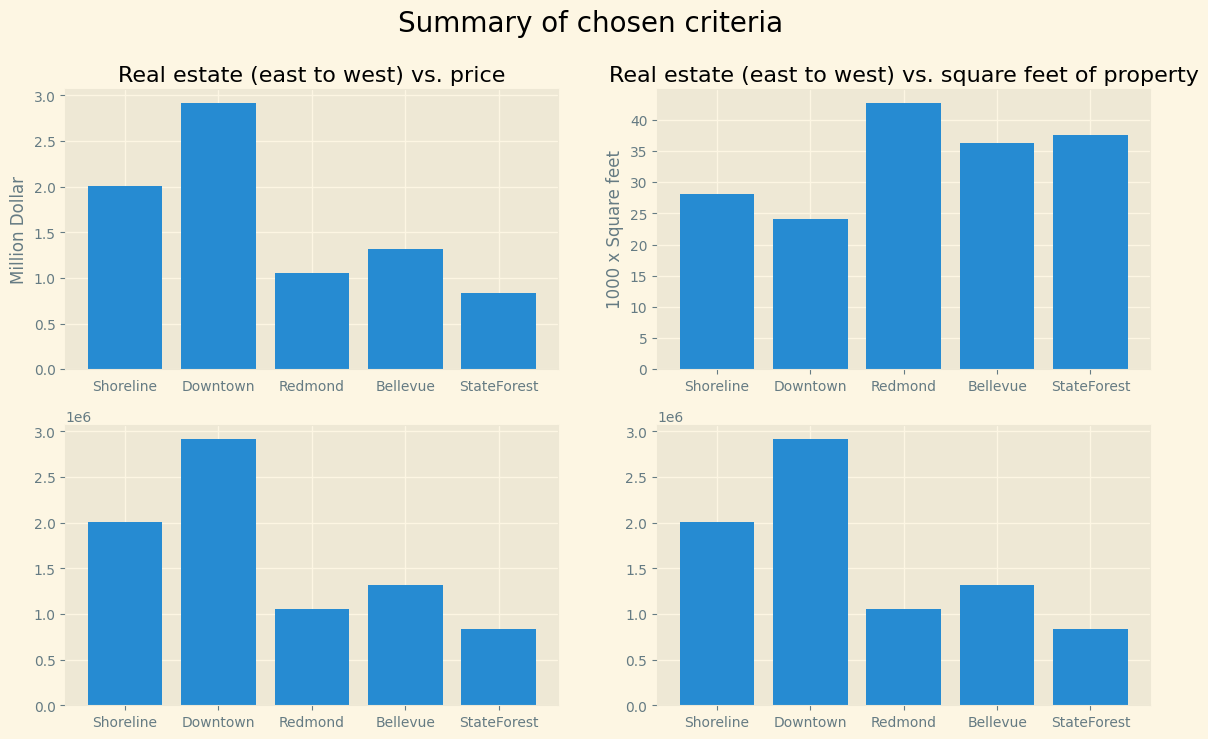

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import altair as alt

#f1 = df3.plot(kind = 'bar',x='Location',y='price') # das sollte ein ganz normaler pandas plot sein!
plt.figure()
plt.figure(figsize=(14,8))  # figsize=(float, float) : Width, height in inches
plt.suptitle('Summary of chosen criteria', fontsize=20) # add a super title to the container
plt.style.use('Solarize_Light2') 

#['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic',\
#  'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', \
# 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', \
# 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', \
# 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']

plt.subplot(2,2,1) # (rows, columns, panel number)
plt.title('Real estate (east to west) vs. price')
plt.ylabel('Million Dollar')
plt.tick_params(
    axis = 'x',
    which = 'both',
    bottom = False
    )
plt.bar(df3['Location'], df3['price'] / 1000000 , align = "center");

plt.subplot (2,2,2)
plt.title('Real estate (east to west) vs. square feet of property')
plt.ylabel('1000 x Square feet')


plt.bar(df3['Location'], df3['sqft_lot'] / 1000 , align = "center");


plt.subplot (2,2,3)
plt.bar(df3['Location'], df3['price'] , align = "center");

plt.subplot (2,2,4)
plt.bar(df3['Location'], df3['price'] , align = "center");




In [36]:
print (plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


** Clean
Deal with missing values, why are they missing?
Extreme values...
are they really outliers?

Relationships:
Check for correlations between values; are all correlations making sense?

BAck to the hypothesis:
Were your assumptions correct?
Did you tackle the right questions?


Fine tune: Keep only relevant and non-redundant plots, check that all plots are clear and self explanatory

** Explain
add explanations and overview document your thought process..
WHY did you do all the analysis?

From protocol:


min: 3 insights from the data
1 should be geographical
3 reommendations for the customer
jupiter notebook to be prepared
readme file to be created
bei plotly benützung gewünscht --> installieren ...pip install save in requirements

